In [13]:
import numpy as np
import sys
import pandas as pd
import seaborn as sns 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

## Diabetes


>About 422 million people worldwide have diabetes, particularly in low-and middle-income countries. Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys, and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. In the past three decades the prevalence of type 2 diabetes has risen dramatically [[1]](https://www.who.int/health-topics/diabetes)

## Diabetes dataset

>Database obtained from Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004): "Least Angle Regression", Annals of Statistics (with discussion), 407-499.
There are ten baseline variables and six blood serum measurements obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. Each row corresponds to the values of one patient [[2]](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

**_Variables_**:

_age_<br/>
_sex_: 1 (male), 2 (female) <br/>
_bmi_: body mass index (kg/m<sup>2</sup>) <br/>
_bp_: average blood pressure (mm Hg)

**_Blood Serum Measurements_**:

_s1_: tc, total cholesterol (mg/dl)<br/> 
_s2_: ldl, Low Density Lipoprotein (LDL) (mg/dl), "bad cholesterol"<br/>
_s3_: hdl, High Density Lipoprotein (HDL) (mg/dl), "good cholesterol"<br/>
_s4_: tch, ratio total cholesterol / HDL<br/>
_s5_: ltg, triglycerides (mmol/l)<br/>
_s6_: glu, glucose (mg/dl) 

**_Response_**:

_y_: a quantitative measure of disease progression one year after baseline

## Goals of the exercise 

1- Take the original _Diabetes_ dataset and preprocess it to get the toy dataset that comes with `scikit-learn`. 
    
2- Given features like age, sex and blood sugar and lipid levels predict the disease progression of diabetes patients after one year. 

## Regression models

In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. In regression, the labels are continuous quantities.

Generally, a linear model makes a prediction by simply computing a weight sum of input features, plus a constant called the bias term or intercept term.

**Simple linear regression**

$\widehat{y}$ = θ<sub>0</sub> + θ<sub>1</sub>x

**Multidimensional linear model**

$\widehat{y}$ = θ<sub>0</sub> + θ<sub>1</sub>x<sub>1</sub> + θ<sub>2</sub>x<sub>2</sub> + ... + θ<sub>n</sub>x<sub>n</sub>

The most common performance measure of a regression model is the **Root Mean Square Error (RMSE)**.The square root of the average of squared differences between prediction and actual observation:

$RSME$ = $\sqrt{\frac{\sum_{j=1}^{n} (y_j - \widehat{y}_j)^2}{n}}$



**Regularization**

A way to reduce overfitting is to regularize the model (e.g. constrain it), having less degrees of freedom. Regularization of a linear model is usually achieved by constraining the weights of the model. 

**Ridge Regression or L2 Regularization**

A regularization term is added to the cost function (MSE). It forces the learning algorithm to fit the data and keep the model weights as small as possible.It penalizes the sum of squares (2-norms) of the model coefficients.

J(θ) = $MSE(θ) + α\frac{1}{2} \sum_{i=1}^{n}θ_i^2$

**Lasso Regression or L1 Regularization**

It uses the l1 norm of the weight vector and penalizes the sum of absolute values (1-norms) of regression coefficients.Lasso tends to eliminate the weights of the least important features (sets them to zero): automatically performs feature selection and outputs a model with few non-zero feature weights.

J(θ) = $MSE(θ) + α\sum_{i=1}^{n}|θ_i|$

**Elastic Net Regularization**

Linear regression with combined L1 and L2 priors as regularizer.

J(θ) = $MSE(θ) + rα\sum_{i=1}^{n}|θ_i| + \frac{1 - r}{2}α \sum_{i=1}^{n}θ_i^2$

When the mix ratio r = 0, Elastic Net is equivalent to Ridge Regression, when r = 1 it is equivalent to Lasso Regression. 

### Download the dataset

1- Download the dataset in _.txt_ format (right click to download) from:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
<br/>
2- Save the file in the same folder as this notebook.

In [14]:
data = pd.read_csv('diabetes_tab.txt', sep= '\s+')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### Explore the dataset

**Rename the columns with meaningful names:**

In [15]:
data.rename(columns={'S1':'total colesterol', 'S2':'LDL',
                     'S3':'HDL', 'S4':'total_col/HDL',
                     'S5':'triglycerides', 'S6':'glucose', 'Y':'progression 1 yr'},
            inplace=True)
data

,AGE,SEX,BMI,BP,total colesterol,LDL,HDL,total_col/HDL,triglycerides,glucose,progression 1 yr
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.00,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.00,180,93.4,43.0,4.00,5.3845,88,310


**Descriptive statistics of the table:**

In [16]:
data.describe()

,AGE,SEX,BMI,BP,total colesterol,LDL,HDL,total_col/HDL,triglycerides,glucose,progression 1 yr
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


**Find the data types of the features in the table:**

In [17]:
data.dtypes

AGE                   int64
SEX                   int64
BMI                 float64
BP                  float64
total colesterol      int64
LDL                 float64
HDL                 float64
total_col/HDL       float64
triglycerides       float64
glucose               int64
progression 1 yr      int64
dtype: object

**Find the number of missing values in the dataset:**

In [18]:
data.isna().sum()

AGE                 0
SEX                 0
BMI                 0
BP                  0
total colesterol    0
LDL                 0
HDL                 0
total_col/HDL       0
triglycerides       0
glucose             0
progression 1 yr    0
dtype: int64

There are no missing values in this dataset.

**Count the number of men and women in the table:**

In [19]:
data['SEX'].value_counts()

1    235
2    207
Name: SEX, dtype: int64

There are more men with diabetes than women in this dataset.

> Male sex has been regarded as a risk factor for the development of type 2 diabetes. The prevalence of diabetes is higher in men than women, but there are more women with diabetes than men [[3]](https://www.ncbi.nlm.nih.gov/pubmed/15111519)

**Find the average age of men and women in the dataset:**

In [20]:
data.groupby('SEX')['AGE'].mean()

SEX
1    46.382979
2    50.942029
Name: AGE, dtype: float64

The average age of diabetic women is higher than the average age of diabetic men in this dataset.

In [21]:
data.groupby('SEX')['AGE'].max()

SEX
1    75
2    79
Name: AGE, dtype: int64

In [22]:
data.groupby('SEX')['AGE'].min()

SEX
1    19
2    20
Name: AGE, dtype: int64

The maximum age of diabetic women in the dataset is 79 years and the minimum is 20 years. For diabetic men the maximum age is 75 years and the minimum 19. 

> The most important demographic change to diabetes prevalence across the world appears to be the increase in the proportion of people >65 years of age [[3]](https://www.ncbi.nlm.nih.gov/pubmed/15111519)

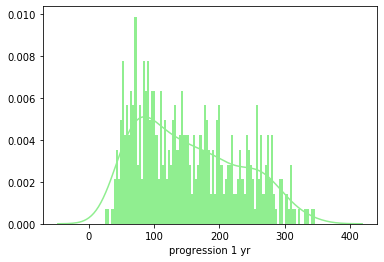

In [26]:
sns.distplot(data['progression 1 yr'],
             bins=100,
             kde=True,color='lightgreen',hist_kws={"linewidth": 15,'alpha':1});

In [27]:
from scipy.stats import normaltest

y = data.iloc[:,10].values

k2, p = normaltest(y)

print("p = ", p)

p =  1.1743678801847827e-14


In [28]:
alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected: y does not follow a normal distribution")
else:
    print("The null hypothesis cannot be rejected: y follows a normal distribution")

The null hypothesis can be rejected: y does not follow a normal distribution


**Plot bmi vs disease progression after 1 year:**

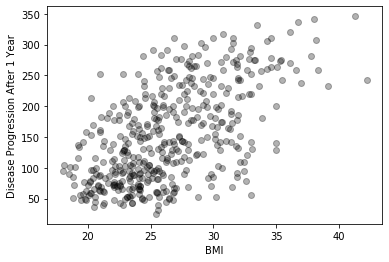

In [11]:
bmi = data.iloc[:,2]
progression = data.iloc[:,-1] # -1: last column

plt.scatter(bmi, progression, color='black', alpha=0.3)
plt.xlabel('BMI')
plt.ylabel('Disease Progression After 1 Year');

**Plot each of the features vs disease progression after 1 year:** 

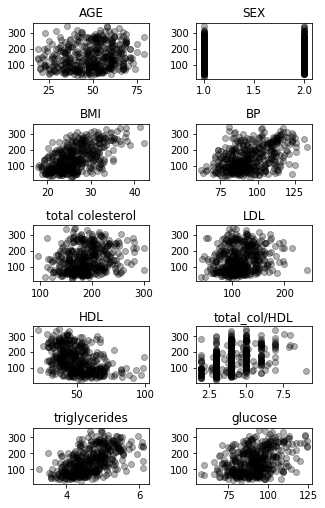

In [12]:
fig = plt.figure(figsize=(5,8))
fig.subplots_adjust(hspace=0.8, wspace=0.4, top=1, bottom=0.2)

column_names = data.columns.tolist()
# remove last element of the list
column_names.pop()

for i in column_names:
    value_index = column_names.index(i)
    column = data.iloc[:, value_index]
    ax = fig.add_subplot(5, 2, value_index+1)
    ax.scatter(column, progression, color='black', alpha=0.3)
    ax.set_title(i, loc='center', y=1)

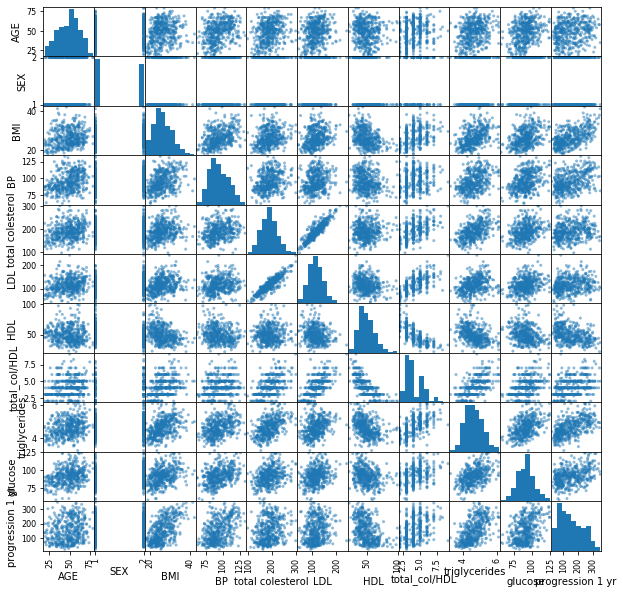

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(data,figsize=(10,10));

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


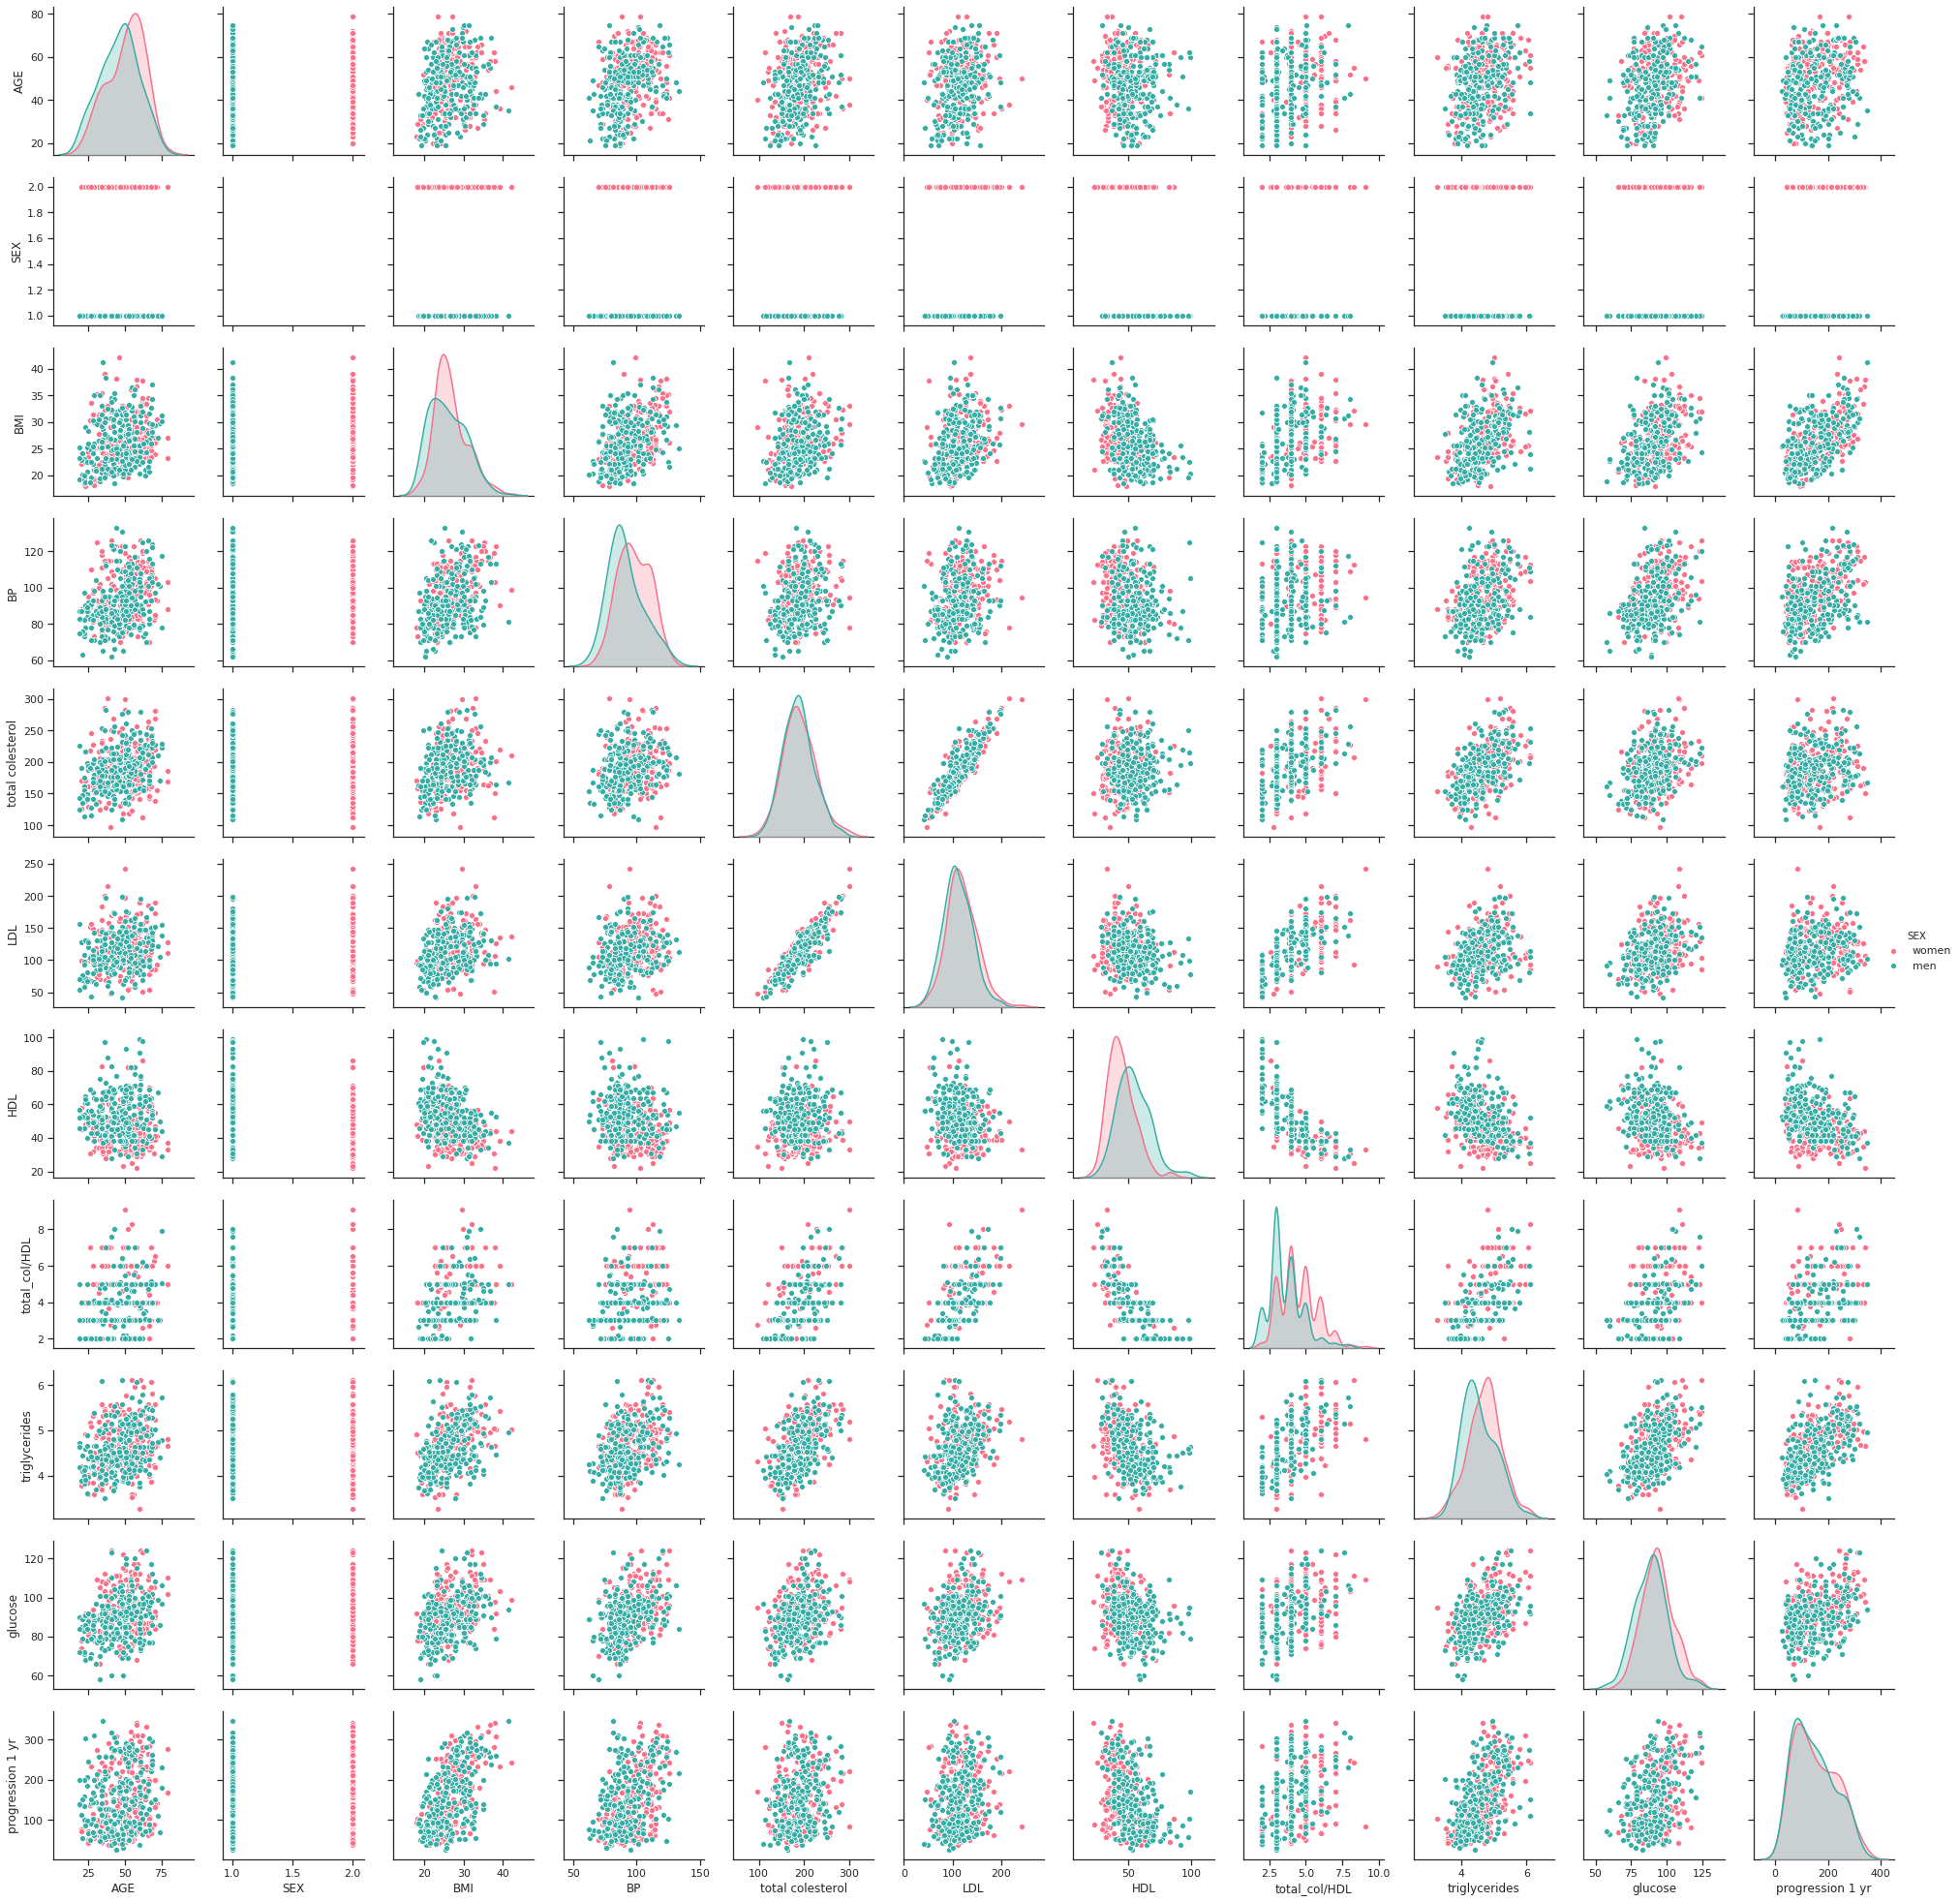

In [14]:
sns.set(style='ticks', color_codes=True)
s = sns.pairplot(data, hue='SEX', palette='husl', hue_order=[2, 1])
new_labels = ['women', 'men']
for t, l in zip(s._legend.texts, new_labels): t.set_text(l)

**Explore the correlation between features:**

In [15]:
# standard correlation coefficient, Pearson's
corr_matrix = data.corr()

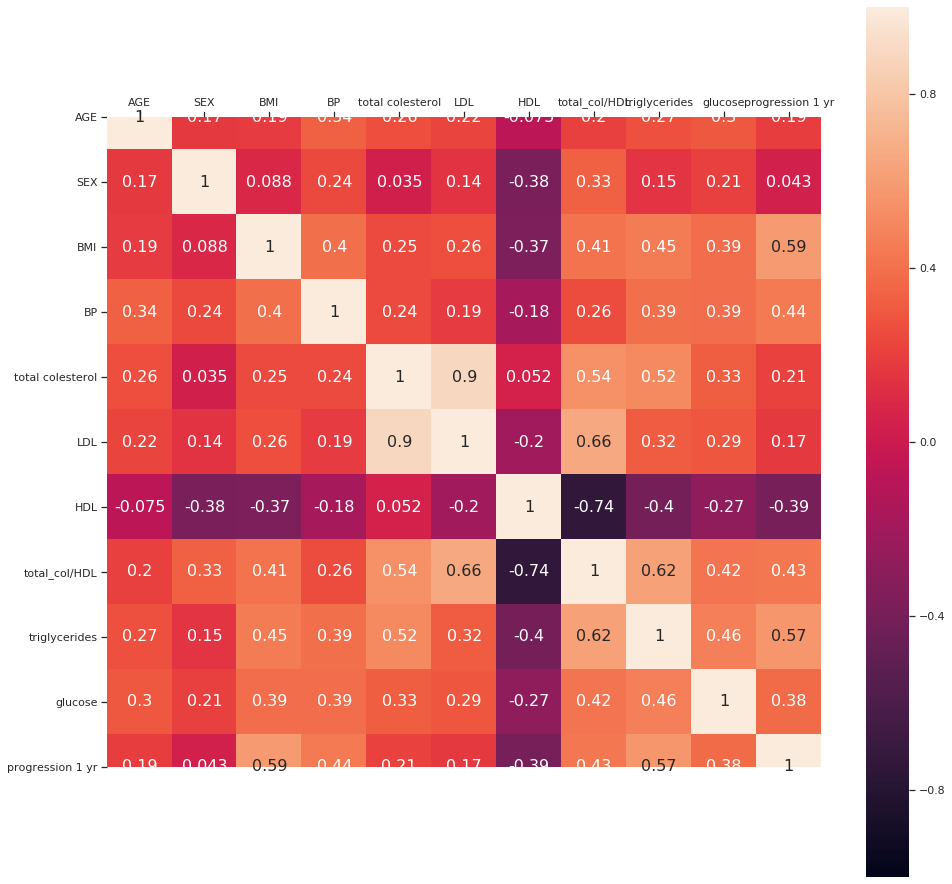

In [16]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix, square=True, annot=True, cbar=True, 
            ax=ax, vmin=-1, vmax=1, annot_kws={"size": 16})
ax.xaxis.set_ticks_position('top');

**Conclusion of the matrix:**

_Sex_ and _BMI_ are negatively correlated with _HDL_.

_BMI_ and the values of _blood pressure_ are positively correlated with the levels of _triglycerides_ and _glucose_.

_Total cholesterol_ levels are positively correlated with the levels of _LDL_ and _triglycerides_ which, in turn, is positively correlated with the levels of _glucose_.

### Pre-process the data

**Convert the data into arrays and reshape it:**

In [17]:
# features
X = data.iloc[:,0:10].values
X.shape

(442, 10)

In [18]:
# labels
y = data.iloc[:,10].values
y.shape

(442,)

In [19]:
# reshape y
y = y.reshape(data.shape[0],1) #len(y)
y.shape

(442, 1)

**Scale the features to center them to mean = 0:**

In [20]:
from sklearn.preprocessing import StandardScaler

# center X to mean = 0
scaler = StandardScaler(with_std=False)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 10.48190045,   0.53167421,   5.72420814, ...,  -0.07024887,
          0.21838914,  -4.260181  ],
       [ -0.51809955,  -0.46832579,  -4.77579186, ...,  -1.07024887,
         -0.74961086, -22.260181  ],
       [ 23.48190045,   0.53167421,   4.12420814, ...,  -0.07024887,
          0.03138914,  -6.260181  ],
       ...,
       [ 11.48190045,   0.53167421,  -1.47579186, ...,  -0.30024887,
         -0.51431086,   3.739819  ],
       [-12.51809955,  -0.46832579,   3.62420814, ...,   0.71975113,
          0.48848914,  -6.260181  ],
       [-12.51809955,  -0.46832579,  -6.77579186, ...,  -1.07024887,
         -0.04631086,   0.739819  ]])

**Standardize X to have unit L2 norm (squared length = 1):**

In [21]:
from sklearn.preprocessing import normalize

X_norm = normalize(X_scaled, norm='l2', axis=0) # axis=0: normalizes each feature
X_norm

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

**Center y to mean = 0:**

In [22]:
scaler = StandardScaler(with_std=False)
y_scaled = scaler.fit_transform(y)
y_scaled

array([[-1.13348416e+00],
       [-7.71334842e+01],
       [-1.11334842e+01],
       [ 5.38665158e+01],
       [-1.71334842e+01],
       [-5.51334842e+01],
       [-1.41334842e+01],
       [-8.91334842e+01],
       [-4.21334842e+01],
       [ 1.57866516e+02],
       [-5.11334842e+01],
       [-8.31334842e+01],
       [ 2.68665158e+01],
       [ 3.28665158e+01],
       [-3.41334842e+01],
       [ 1.88665158e+01],
       [ 1.38665158e+01],
       [-8.13348416e+00],
       [-5.51334842e+01],
       [ 1.58665158e+01],
       [-8.41334842e+01],
       [-1.03133484e+02],
       [-8.41334842e+01],
       [ 9.28665158e+01],
       [ 3.18665158e+01],
       [ 4.98665158e+01],
       [-1.51334842e+01],
       [-6.71334842e+01],
       [-2.11334842e+01],
       [ 1.30866516e+02],
       [-2.31334842e+01],
       [-9.31334842e+01],
       [ 1.88866516e+02],
       [-6.51334842e+01],
       [-8.71334842e+01],
       [-5.01334842e+01],
       [ 1.12866516e+02],
       [ 1.23866516e+02],
       [ 9.9

### Train the models

**Split the data into train and test set:**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_scaled, random_state=0)

**Train a Linear Regression model:**

Cross-validation splitting strategy in 5 folds.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

reg = LinearRegression()
param_grid = [{'fit_intercept': [False, True]}]

n_folds = 5

model_reg = GridSearchCV(reg, param_grid, cv=n_folds)
model_reg.fit(X_train, y_train)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid=[{'fit_intercept': [False, True]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Find the best parameters of the model:**

In [25]:
model_reg.best_params_

{'fit_intercept': False}

In [26]:
optimized_model_reg = model_reg.best_estimator_

In [27]:
optimized_model_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

**Find the values predicted by the model:**

In [28]:
y_predicted = optimized_model_reg.predict(X_test)

**Find the metrics obtained with the model:**

In [29]:
coef = optimized_model_reg.coef_
incpt = optimized_model_reg.intercept_

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print ('Linear regression model:\n')
print ('Intercept = %0.3f' % incpt )
print ('Coefficients =', coef)
print ('Mean squared error = %0.3f' % mean_squared_error(y_test, y_predicted))
print ('r2 score = %0.3f' % r2_score(y_test, y_predicted))

Linear regression model:

Intercept = 0.000
Coefficients = [[ -43.08603027 -208.13173033  593.0825414   302.41837165 -557.34052369
   257.33330529   -8.6528926   138.3566405   701.67437573   28.4989977 ]]
Mean squared error = 3174.318
r2 score = 0.361


In [31]:
from regressors import stats

coef_pval_train = stats.coef_pval(optimized_model_reg, X_train, y_train)

# calculate the p-values of beta coefficients of training set
print ('p values of coefficients train set:\n',np.savetxt(sys.stdout, coef_pval_train, fmt="%.3f"))

1.000
0.515
0.002
0.000
0.000
0.103
0.311
0.956
0.371
0.000
0.685
p values of coefficients train set:
 None


In [32]:
coef_pval_test = stats.coef_pval(optimized_model_reg, X_test, y_test)

# calculate the p-values of beta coefficients of training set
print ('p values of coefficients test set:\n', np.savetxt(sys.stdout, coef_pval_test, fmt="%.3f"))

1.000
0.729
0.110
0.000
0.014
0.528
0.712
0.977
0.644
0.009
0.853
p values of coefficients test set:
 None


**Plot the real values vs the predicted values:**

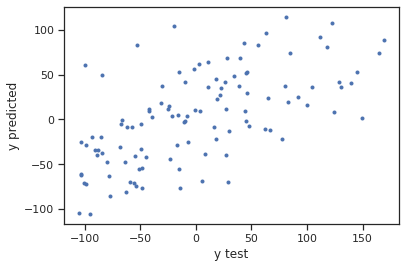

In [33]:
# plot prediction and actual data
plt.plot(y_test, y_predicted, '.')
plt.xlabel("y test")
plt.ylabel("y predicted");

**Plot the residuals:**

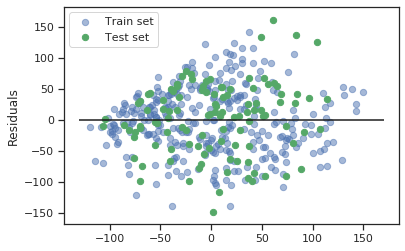

In [34]:
plt.scatter(optimized_model_reg.predict(X_train), optimized_model_reg.predict(X_train) - y_train,
           c='b', s=40, alpha=0.5, label='Train set')
plt.scatter(y_predicted, y_predicted - y_test, c='g', s=40, label='Test set')
plt.hlines(y = 0, xmin = -130, xmax=170)
plt.ylabel('Residuals')
plt.legend(loc='upper left');

**Train a Linear Regression model with Ridge Regularization:**

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=0)
param_grid = [{'alpha': [0.0001, 0.001, 0.1, 1]}]

n_folds = 5

model_ridge = GridSearchCV(ridge, param_grid, cv=n_folds)
model_ridge.fit(X_train, y_train)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=0,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.001, 0.1, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Find the best parameters of the model:**

In [36]:
model_ridge.best_params_

{'alpha': 0.1}

**Mean cross-validated score of the best_estimator:**

In [37]:
model_ridge.best_score_

0.5173463643411391

In [38]:
model_ridge.best_estimator_ 

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [39]:
optimized_model_ridge = model_ridge.best_estimator_

In [40]:
optimized_model_ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

**Find the values predicted by the model:**

In [41]:
y_predicted_ridge = optimized_model_ridge.predict(X_test)

**Find the metrics obtained with the model:**

In [42]:
coef_ridge = optimized_model_ridge.coef_
incpt_ridge = optimized_model_ridge.intercept_

In [43]:
print ('Ridge regression model:\n')
print ('Intercept = %0.3f' % incpt_ridge)
print ('Coefficients =', coef_ridge)
print ('Mean squared error = %0.3f' % mean_squared_error(y_test, y_predicted_ridge))
print ('r2 score = %0.3f' % r2_score(y_test, y_predicted_ridge))

Ridge regression model:

Intercept = 0.730
Coefficients = [[ -24.57790675 -176.85546131  542.0707427   278.67782778  -64.29376916
  -106.36168475 -203.48228716  103.46294735  455.47284492   57.86903991]]
Mean squared error = 3132.421
r2 score = 0.369


**Plot the real values vs the predicted values:**

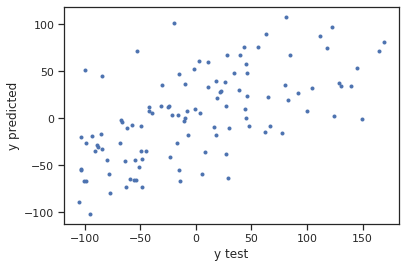

In [44]:
# plot prediction and actual data
plt.plot(y_test, y_predicted_ridge, '.')
plt.xlabel("y test")
plt.ylabel("y predicted");

**Train a Linear Regression model with Lasso Regularization:**

In [45]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=0)
param_grid = [{'alpha': [0.0001, 0.001, 0.1, 1]}]

n_folds = 5

model_lasso = GridSearchCV(lasso, param_grid, cv=n_folds)
model_lasso.fit(X_train, y_train)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.001, 0.1, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Find the best parameters of the model:**

In [46]:
model_lasso.best_params_

{'alpha': 0.1}

In [47]:
optimized_model_lasso = model_lasso.best_estimator_

In [48]:
optimized_model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

**Find the values predicted by the model:**

In [49]:
y_predicted_lasso = optimized_model_lasso.predict(X_test)

**Find the metrics obtained with the model:**

In [50]:
coef_lasso = optimized_model_lasso.coef_
incpt_lasso = optimized_model_lasso.intercept_

In [51]:
print ('Lasso regression model:\n')
print ('Intercept = %0.3f' % incpt_lasso)
print ('Coefficients =',coef_lasso)
print ('Mean squared error = %0.3f' % mean_squared_error(y_test, y_predicted_lasso))
print ('r2 score = %0.3f' % r2_score(y_test, y_predicted_lasso))

Lasso regression model:

Intercept = 0.854
Coefficients = [  -0.         -129.77988734  592.21092352  240.11907082  -41.57065436
  -47.68511695 -219.12895742    0.          507.32681866    0.        ]
Mean squared error = 3202.017
r2 score = 0.355


**Plot the real values vs the predicted values:**

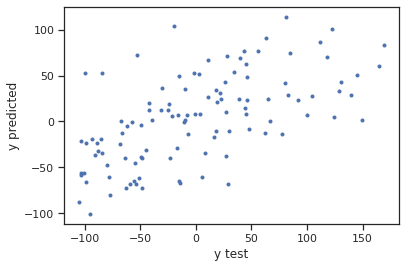

In [52]:
# plot prediction and actual data
plt.plot(y_test, y_predicted_lasso, '.')
plt.xlabel("y test")
plt.ylabel("y predicted");

**Train a Linear Regression model with Elasticnet Regularization:**

In [53]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(random_state=0)
param_grid = [{'alpha': [0.0001, 0.001, 0.1, 1],
               'l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75, 1]}]

n_folds = 5

model_enet = GridSearchCV(enet, param_grid, cv=n_folds)
model_enet.fit(X_train, y_train)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=0, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.001, 0.1, 1],
                          'l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Find the best parameters of the model:**

In [54]:
model_enet.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [55]:
optimized_model_enet = model_enet.best_estimator_

In [56]:
optimized_model_enet.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

**Find the values predicted by the model:**

In [57]:
y_predicted_enet = optimized_model_enet.predict(X_test)

**Find the metrics obtained with the model:**

In [58]:
coef_enet = optimized_model_enet.coef_
incpt_enet = optimized_model_enet.intercept_

In [59]:
print ('Elasticnet regression model:\n')
print ('Intercept = %0.3f' % incpt_enet)
print ('Coefficients =',coef_enet)
print ('Mean squared error = %0.3f' % mean_squared_error(y_test, y_predicted_enet))
print ('r2 score = %0.3f' % r2_score(y_test, y_predicted_enet))

Elasticnet regression model:

Intercept = 0.854
Coefficients = [  -0.         -129.77988734  592.21092352  240.11907082  -41.57065436
  -47.68511695 -219.12895742    0.          507.32681866    0.        ]
Mean squared error = 3202.017
r2 score = 0.355


**Plot the real values vs the predicted values:**

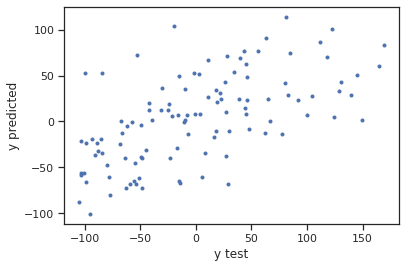

In [60]:
# plot prediction and actual data
plt.plot(y_test, y_predicted_enet, '.')
plt.xlabel("y test")
plt.ylabel("y predicted");

### Conclusion

The Ridge regresson model is the one that gives the higher r<sup>2</sup> value and the lowest MSE so it is the best of the 3 linear regression models.

### Other models

**Support Vector Regression:**

In [61]:
from sklearn.svm import SVR

svr = SVR()
param_grid = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [1, 10, 100, 1000, 10000], 
              'epsilon': [0.1, 0.3, 0.5,0.6, 0.7, 0.8, 0.9]}]

n_folds = 5

model_svr = GridSearchCV(svr, param_grid, cv=n_folds)
model_svr.fit(X_train, y_train)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-v

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-v

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/svm/base.py:193:

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'epsilon': [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
model_svr.best_params_

{'C': 1000, 'epsilon': 0.8, 'kernel': 'linear'}

In [63]:
optimized_model_svr = model_svr.best_estimator_

In [64]:
optimized_model_svr.fit(X_train, y_train)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.8,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
y_predicted_svr = optimized_model_svr.predict(X_test)

In [66]:
coef_svr = optimized_model_svr.coef_
incpt_svr = optimized_model_svr.intercept_

In [67]:
print ('SVR regression model:\n')
print ('Intercept = %0.3f' % incpt_svr)
print ('Coefficients = ', coef_svr)
print ('Mean squared error = %0.3f' % mean_squared_error(y_test, y_predicted_svr))
print ('r2 score = %0.3f' % r2_score(y_test, y_predicted_svr))

SVR regression model:

Intercept = 3.476
Coefficients =  [[ -89.274794   -294.95084227  561.15761741  370.48096166  -72.31365349
  -106.75238171 -224.72926748  108.42240233  500.4141791    12.26337636]]
Mean squared error = 3227.328
r2 score = 0.350


In [68]:
score_svr = optimized_model_svr.score(X_train, y_train)
score_svr

0.5486024457569669

In [69]:
score_svr_test = optimized_model_svr.score(X_test, y_test)
score_svr_test

0.34990759983253117

**Random Forest Regressor:**

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
param_grid = [{'n_estimators': [1000, 2000, 3000, 4000, 5000], # number of trees
              'max_depth': [1, 10, 50]}] # maximum depth of the tree

n_folds = 5

model_rf= GridSearchCV(rf, param_grid, cv=n_folds)
model_rf.fit(X_train, y_train)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [1, 10, 50],
       

In [71]:
model_rf.best_params_

{'max_depth': 10, 'n_estimators': 5000}

In [72]:
optimized_model_rf = model_rf.best_estimator_

In [73]:
y_predicted_rf = optimized_model_rf.predict(X_test)

In [74]:
print ('Random Forest regression model:\n')
print ('Mean squared error = %0.3f' % mean_squared_error(y_test, y_predicted_rf))
print ('r2 score = %0.3f' % r2_score(y_test, y_predicted_rf))

Random Forest regression model:

Mean squared error = 3762.852
r2 score = 0.242


In [76]:
print (optimized_model_rf.feature_importances_)

[0.04693626 0.0097168  0.33139699 0.09316128 0.041447   0.04992801
 0.05596287 0.02599648 0.28555521 0.05989909]


The most important features are the BMI and the level of triglycerides.